In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 #Create database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
#Insert sample data
sample_data = [
    ("Chocolate", 10, 2.5),
    ("Biscuits", 15, 1.5),
    ("Chips", 8, 2.0),
    ("Chocolate", 5, 2.5),
    ("Biscuits", 7, 1.5)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [6]:
#Run SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)


Sales Summary:
     product  total_qty  revenue
0   Biscuits         44     66.0
1      Chips         16     32.0
2  Chocolate         30     75.0


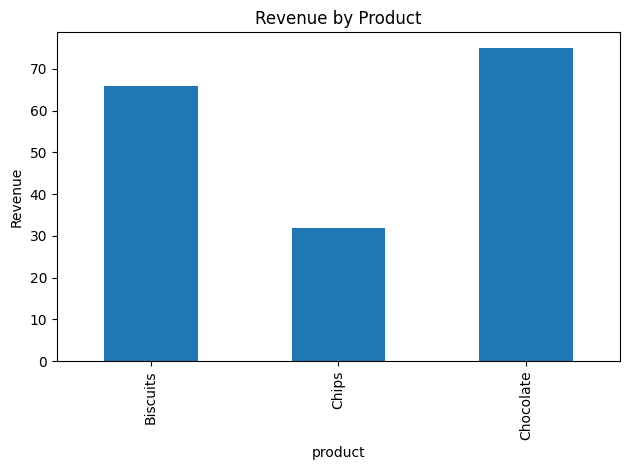

In [7]:

#Plot bar chart of revenue
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()



In [8]:
#Close connection
conn.close()